Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [48]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

# DataPreprocessing

In [2]:
#Loading dataset
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


object: Object format means variables are categorical. 

float64: It represents the variable that has some decimal values involved. They are also numerical

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

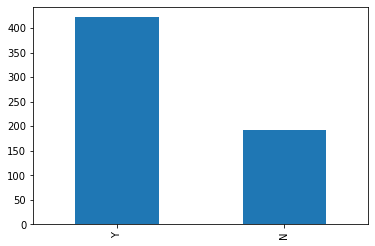

In [7]:
df["Loan_Status"].value_counts().plot.bar()

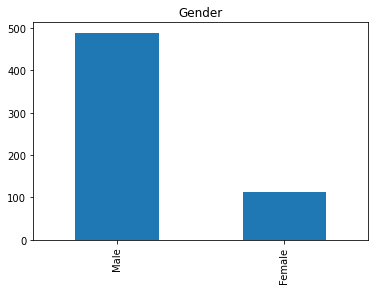

In [10]:
df["Gender"].value_counts().plot.bar(title="Gender")
plt.show()

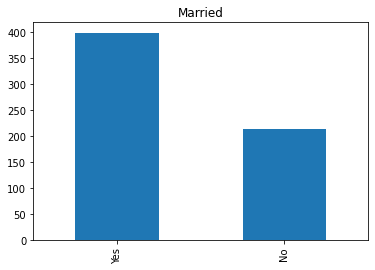

In [11]:
df["Married"].value_counts().plot.bar(title="Married")
plt.show()

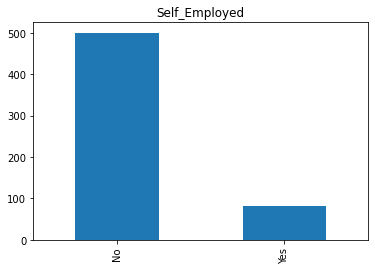

In [12]:
df["Self_Employed"].value_counts().plot.bar(title="Self_Employed")
plt.show()

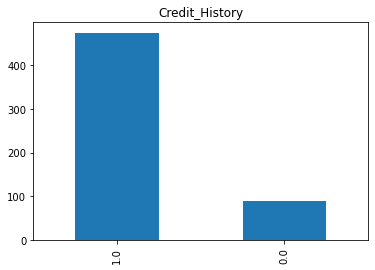

In [13]:
df["Credit_History"].value_counts().plot.bar(title="Credit_History")
plt.show()

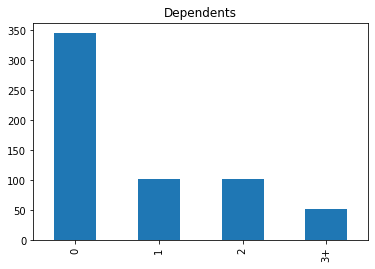

In [14]:
df["Dependents"].value_counts().plot.bar(title="Dependents")
plt.show()

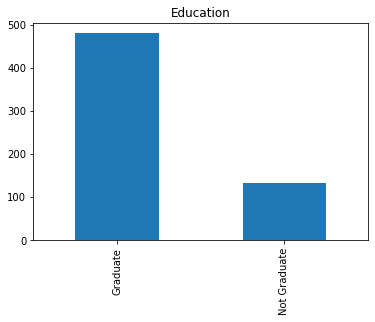

In [15]:
df["Education"].value_counts().plot.bar(title="Education")
plt.show()

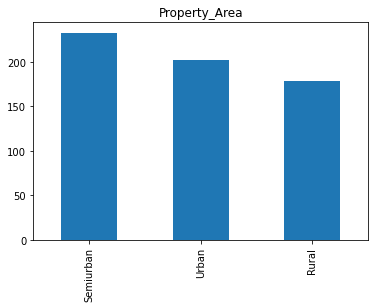

In [16]:
df["Property_Area"].value_counts().plot.bar(title="Property_Area")
plt.show()

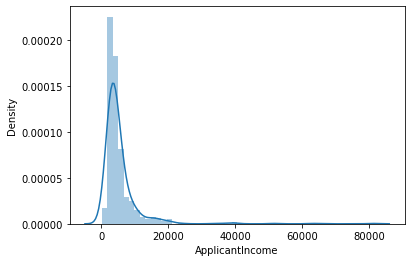

NameError: name 'train' is not defined

In [17]:
sns.distplot(df["ApplicantIncome"])
plt.show()
train["ApplicantIncome"].plot.box()
plt.show()

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

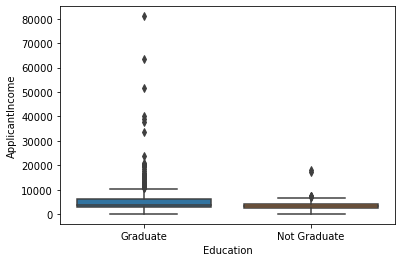

In [23]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

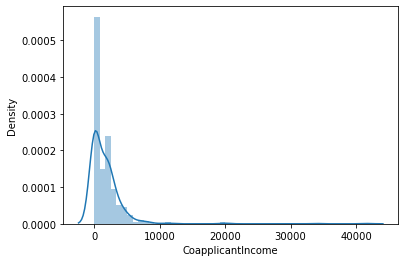

In [19]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

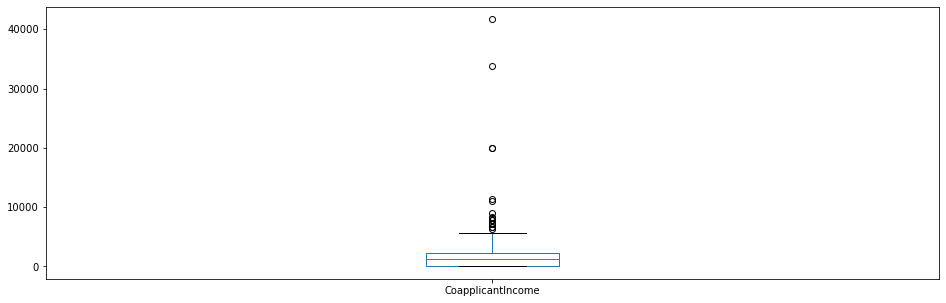

In [20]:
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

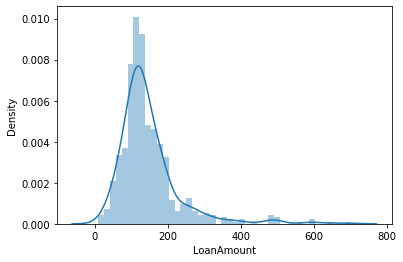

In [21]:
sns.distplot(df["LoanAmount"])
plt.show()

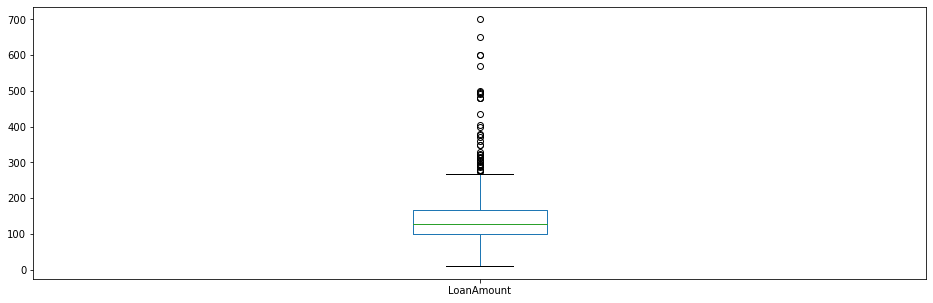

In [22]:
df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [24]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The first thing to do is to deal with the missing value 

In [25]:
#categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [26]:
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

Next we have to handle the outliers , one solution is just to remove them but we can also log transform

In [27]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['TotalIncome']= df['ApplicantIncome'] +df['CoapplicantIncome'] 
df['TotalIncome_log']=np.log(df['TotalIncome'])

# Modeling

we need to turn all the categorical variables into numbers.

In [29]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:   
    df[i] = encoder.fit_transform(df[i]) 
    df.dtypes

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [34]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [35]:
df[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


We need to find best random state to get more accurate score of all models.

In [37]:
x = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [38]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    mod=DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7891891891891892  on Random_state  158


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=158, test_size=0.1)

Accuracy score of all models in one function

In [40]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
Accuracy Score: 0.9193548387096774
Confusion Matrix: [[15  5]
 [ 0 42]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.89      1.00      0.94        42

    accuracy                           0.92        62
   macro avg       0.95      0.88      0.90        62
weighted avg       0.93      0.92      0.92        62



Accuracy score of DecisionTreeClassifier() is:
Accuracy Score: 0.8064516129032258
Confusion Matrix: [[14  6]
 [ 6 36]]
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.86      0.86      0.86        42

    accuracy                           0.81        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.81      0.81      0.81        62



Accuracy score of SVC() is:
Accuracy Score: 0.6774193548387096

In above comparision between all three models, LogisticRegression model is giving best accuracy. Still we can't finalize LogisticRegression as best model. We need to do further analysis.

# Cross Validation

In [41]:
cvs=cross_val_score(LogisticRegression(),x,y,cv=5)
print("cross validation score of LogisticRegression model :",cvs.mean())
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())
cvs=cross_val_score(SVC(),x,y,cv=5)
print("cross validation score of SVC model :",cvs.mean())
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",cvs.mean())

cross validation score of LogisticRegression model : 0.8029588164734107
cross validation score of DecisionTreeClassifier model : 0.7247900839664134
cross validation score of SVC model : 0.6856590697054512
cross validation score of RandomForestClassifier model : 0.7931893909103025


By cross validation score we can surely confirm that LogisticRegression  model is the best model for our problem statement. Let's do further processing to improve this score more.

# Hyper Parameter Tuning

In [49]:
logistic=LogisticRegression()
penalty=['l1','l2']
C=np.logspace(0,4,10)

hyperparameters=dict(C=C,penalty=penalty)
clf=GridSearchCV(logistic,hyperparameters,cv=5,verbose=0)
best_model=clf.fit(x,y)

print('Best penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 166.81005372000593


In [54]:
model=LogisticRegression(C=166,penalty='l2')
results=cross_val_score(model,x,y,cv=5)
print("Accuracy:",results.mean()*100)

Accuracy: 80.45981607357058


In [56]:
import joblib
joblib.dump(model,"LoanApplicationStatusPrediction.pkl")

['LoanApplicationStatusPrediction.pkl']